In [ ]:
#Import thư viện
import tensorflow 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Link drive data: https://drive.google.com/file/d/1wm0xxsreonBGIbjcMlXpxW81mDcqExEe/view?usp=sharing

In [ ]:
#Read data
#Dữ liệu: Thông tin thời tiết của thành phố Tetouan, Morocco (Ma Rốc) trong năm 2017.
url = 'https://drive.google.com/file/d/1wm0xxsreonBGIbjcMlXpxW81mDcqExEe/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path, index_col='DateTime',parse_dates=True)

In [ ]:
#Hiển thị data
print(df.shape)
df.head(-1)

(52416, 3)


,Temperature,Humidity,Wind Speed
DateTime,,,
2017-01-01 00:00:00,6.559,73.8,0.083
2017-01-01 00:10:00,6.414,74.5,0.083
2017-01-01 00:20:00,6.313,74.5,0.080
2017-01-01 00:30:00,6.121,75.0,0.083
2017-01-01 00:40:00,5.921,75.7,0.081
...,...,...,...
2017-12-30 23:00:00,7.070,72.5,0.080
2017-12-30 23:10:00,7.010,72.4,0.080
2017-12-30 23:20:00,6.947,72.6,0.082


<AxesSubplot:xlabel='DateTime'>

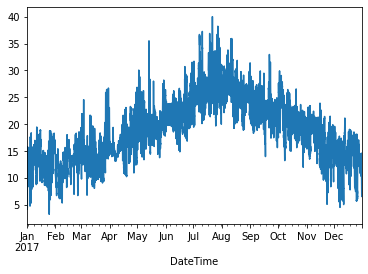

In [ ]:
#Hiển thị Nhiệt độ trên đồ thị
temperature = df['Temperature']
temperature.plot()

# **Xử lý data**


In [ ]:
def df_to_X_y(df, n_timesteps):

  #Chuyển data về dạng numpy
  df_to_np = df.to_numpy()

  #Khởi tạo X, y 
  X = []
  y = []

  for i in range(len(df_to_np) - n_timesteps):
    #[1,2,3,4,5,6] => [7]
    #[2,3,4,5,6,7] => [8]

    #Sử dụng 6 hàng dữ liệu để dự đoán 1 hàng tiếp theo (Cứ 60 phút thì dự đoán 10 phút tiếp theo)
    X.append([[arr] for arr in df_to_np[i : i + n_timesteps]])

    #Thêm dữ liệu tiếp theo sau khi gom cụm dữ liệu
    y.append(df_to_np[i + n_timesteps])

  return np.array(X), np.array(y)

In [ ]:
n_timesteps = 6

#Chuyển data về dạng X, y
X, y = df_to_X_y(temperature, n_timesteps)
X.shape, y.shape

((52410, 6, 1), (52410,))

In [ ]:
#Tách data
X_train, y_train = X[:40000], y[:40000]
X_valid, y_valid = X[40000:45000], y[40000:45000]
X_test, y_test = X[45000:50000], y[45000:50000]
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((40000, 6, 1), (40000,), (5000, 6, 1), (5000,), (5000, 6, 1), (5000,))

In [ ]:
# Model sử dụng:
# Mô hình 1: Vanilla LSTM
# Mô hình 2: Stacked LSTM
# Mô hình 3: Bidirectional LSTM


# **Model1** **(Vanilla LSTM)**




**Xây dựng model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

#Sử dụng 6 giá trị nhiệt độ để dự đoán 1 giá trị nhiệt độ tiếp theo
n_timesteps = 6

#Dự đoán 1 giá trị nhiệt độ
n_features = 1

V_LSTM = Sequential()
V_LSTM.add(InputLayer((n_timesteps, n_features)))
V_LSTM.add(LSTM(50))
V_LSTM.add(Dense(1, 'linear'))

V_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
V_LSTM.compile(loss = 'mse', optimizer='adam')

In [ ]:
history1 = V_LSTM.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10)

Epoch 1/10
1250/1250 [==============================] - 5s 3ms/step - loss: 30.2803 - val_loss: 0.0744
Epoch 2/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4794 - val_loss: 0.0475
Epoch 3/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1372 - val_loss: 0.0319
Epoch 4/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0719 - val_loss: 0.0315
Epoch 5/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0537 - val_loss: 0.0328
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0460 - val_loss: 0.0301
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0429 - val_loss: 0.0302
Epoch 8/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0408 - val_loss: 0.0337
Epoch 9/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0406 - val_loss: 0.0302
Epoch 10/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.03

**Hiển thị Error Rate**

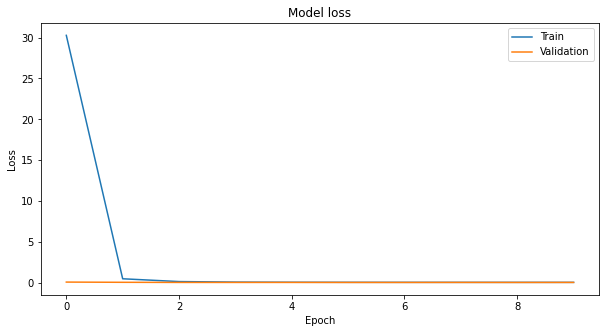

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)
# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**Kết quả dự đoán của mô hình**

In [ ]:
predictions = V_LSTM.predict(X_test).flatten()

#Lấy data từ df để hiển thị 
results = df[45000 + n_timesteps : 50000 + n_timesteps]

#Gán giá trị vừa dự đoán vào df
results['Temperature'] =  y_test
results['Predictions'] =  predictions

#Ẩn cột Humidity, Wind Speed
results.drop(columns=['Humidity', 'Wind Speed'])

,Temperature,Predictions
DateTime,,
2017-11-09 13:00:00,20.83,20.631523
2017-11-09 13:10:00,20.85,20.879160
2017-11-09 13:20:00,20.85,20.829868
2017-11-09 13:30:00,20.95,20.821213
2017-11-09 13:40:00,20.80,20.968279
...,...,...
2017-12-14 05:30:00,11.52,11.522019
2017-12-14 05:40:00,11.61,11.422032
2017-12-14 05:50:00,11.60,11.594333


**Hiển thị kết quả dự đoán trên đồ thị**

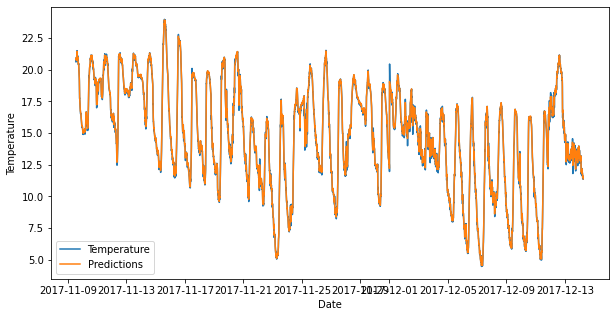

In [ ]:
plt.plot(results['Predictions'])
plt.plot(results['Temperature'])
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.legend(['Temperature', 'Predictions'], loc='lower left')

# **Model2** **(Stacked LSTM)**

**Xây dựng model**

In [ ]:
from tensorflow.keras.models import Sequential

#Sử dụng 6 giá trị nhiệt độ để dự đoán 1 giá trị nhiệt độ tiếp theo
n_timesteps = 6

#Dự đoán 1 giá trị nhiệt độ
n_features = 1

S_LSTM = Sequential()
S_LSTM.add(InputLayer((n_timesteps, n_features)))
S_LSTM.add(LSTM(50, activation='relu', return_sequences=True))
S_LSTM.add(LSTM(50, activation='relu'))
S_LSTM.add(Dense(1, 'linear'))

S_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 6, 50)             10400     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
S_LSTM.compile(loss = 'mse', optimizer='adam')

In [ ]:
history2 = S_LSTM.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10)

Epoch 1/10
1250/1250 [==============================] - 7s 4ms/step - loss: 2.9582 - val_loss: 0.0602
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0699 - val_loss: 0.0467
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0605 - val_loss: 0.0383
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0534 - val_loss: 0.0416
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0513 - val_loss: 0.0626
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0495 - val_loss: 0.0311
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0471 - val_loss: 0.0318
Epoch 8/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0456 - val_loss: 0.0298
Epoch 9/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0457 - val_loss: 0.0300
Epoch 10/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.045

**Hiển thị Error Rate**

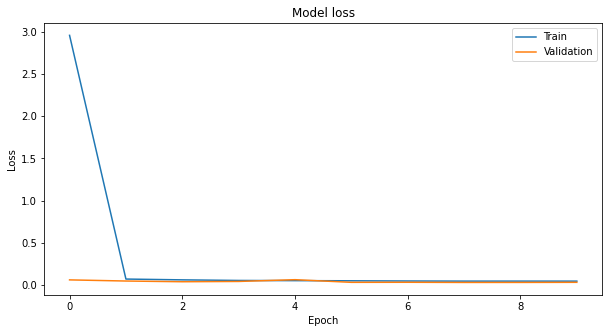

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)
# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**Kết quả dự đoán của mô hình**

In [ ]:
predictions = S_LSTM.predict(X_test).flatten()

#Lấy data từ df để hiển thị 
results = df[45000 + n_timesteps:50000 + n_timesteps]

#Gán giá trị vừa dự đoán vào df
results['Temperature'] =  y_test
results['Predictions'] =  predictions

#Ẩn cột Humidity, Wind Speed
results.drop(columns=['Humidity', 'Wind Speed'])


,Temperature,Predictions
DateTime,,
2017-11-09 13:00:00,20.83,20.663763
2017-11-09 13:10:00,20.85,20.891754
2017-11-09 13:20:00,20.85,20.855171
2017-11-09 13:30:00,20.95,20.861420
2017-11-09 13:40:00,20.80,20.996349
...,...,...
2017-12-14 05:30:00,11.52,11.537016
2017-12-14 05:40:00,11.61,11.430195
2017-12-14 05:50:00,11.60,11.602506


**Hiển thị kết quả dự đoán trên đồ thị**

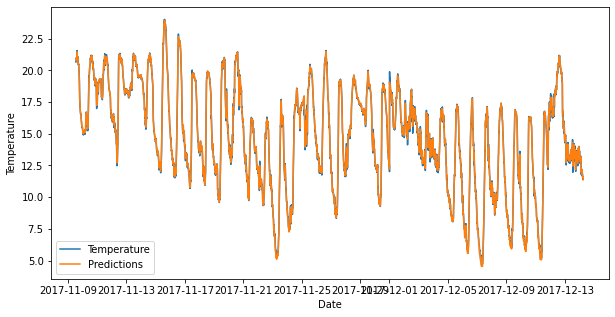

In [ ]:
plt.plot(results['Predictions'])
plt.plot(results['Temperature'])
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.legend(['Temperature', 'Predictions'], loc='lower left')

# **Model3 (Bidirectional LSTM)**

**Xây dựng model**

In [ ]:
from keras.layers import Bidirectional

#Sử dụng 6 giá trị nhiệt độ để dự đoán 1 giá trị nhiệt độ tiếp theo
n_timesteps = 6

#Dự đoán 1 giá trị nhiệt độ
n_features = 1

B_LSTM = Sequential()
B_LSTM.add(InputLayer((n_timesteps, n_features)))
B_LSTM.add(Bidirectional(LSTM(50, activation='relu')))
B_LSTM.add(Dense(1, 'linear'))

B_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 100)              20800     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
B_LSTM.compile(loss = 'mse', optimizer='adam')

In [ ]:
history3 = B_LSTM.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10)

Epoch 1/10
1250/1250 [==============================] - 5s 3ms/step - loss: 4.4519 - val_loss: 0.0614
Epoch 2/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0842 - val_loss: 0.0726
Epoch 3/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0890 - val_loss: 0.0584
Epoch 4/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0871 - val_loss: 0.1221
Epoch 5/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0805 - val_loss: 0.1048
Epoch 6/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0789 - val_loss: 0.0910
Epoch 7/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0674 - val_loss: 0.0444
Epoch 8/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0568 - val_loss: 0.0544
Epoch 9/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0515 - val_loss: 0.0351
Epoch 10/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.048

**Hiển thị Error Rate**

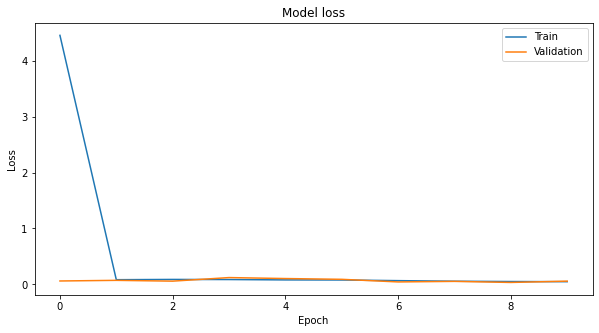

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)
# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**Kết quả dự đoán của mô hình**

In [ ]:
predictions = B_LSTM.predict(X_test).flatten()

#Lấy data từ df để hiển thị 
results = df[45000 + n_timesteps:50000 + n_timesteps]

#Gán giá trị vừa dự đoán vào df
results['Temperature'] =  y_test
results['Predictions'] =  predictions

#Ẩn cột Humidity, Wind Speed
results.drop(columns=['Humidity', 'Wind Speed'])

,Temperature,Predictions
DateTime,,
2017-11-09 13:00:00,20.83,20.854883
2017-11-09 13:10:00,20.85,21.077551
2017-11-09 13:20:00,20.85,21.011526
2017-11-09 13:30:00,20.95,21.033663
2017-11-09 13:40:00,20.80,21.188070
...,...,...
2017-12-14 05:30:00,11.52,11.711999
2017-12-14 05:40:00,11.61,11.620673
2017-12-14 05:50:00,11.60,11.761734


**Hiển thị kết quả dự đoán trên đồ thị**

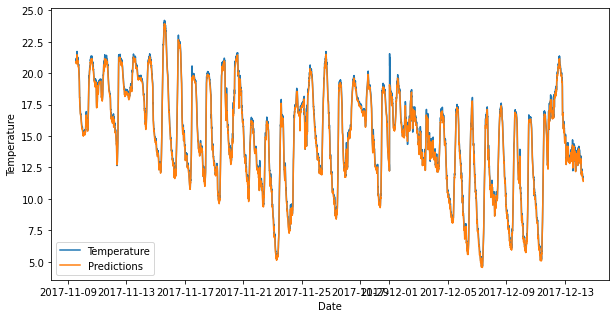

In [ ]:
plt.plot(results['Predictions'])
plt.plot(results['Temperature'])
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.legend(['Temperature', 'Predictions'], loc='lower left')

# **Tổng kết**

In [ ]:
V_predictions = V_LSTM.predict(X_test).flatten()
S_predictions = S_LSTM.predict(X_test).flatten()
B_predictions = B_LSTM.predict(X_test).flatten()

#Lấy data từ df để hiển thị 
results = df[45000 + n_timesteps:50000 + n_timesteps]

#Gán giá trị vừa dự đoán vào df
results['Temperature'] =  y_test
results['Predictions (Vanilla)'] =  V_predictions
results['Predictions (Stacked)'] =  S_predictions
results['Predictions (Bidirectional)'] =  B_predictions

#Ẩn cột Humidity, Wind Speed
results.drop(columns=['Humidity', 'Wind Speed'])

,Temperature,Predictions (Vanilla),Predictions (Stacked),Predictions (Bidirectional)
DateTime,,,,
2017-11-09 13:00:00,20.83,20.631523,20.663763,20.854883
2017-11-09 13:10:00,20.85,20.879160,20.891754,21.077551
2017-11-09 13:20:00,20.85,20.829868,20.855171,21.011526
2017-11-09 13:30:00,20.95,20.821213,20.861420,21.033663
2017-11-09 13:40:00,20.80,20.968279,20.996349,21.188070
...,...,...,...,...
2017-12-14 05:30:00,11.52,11.522019,11.537016,11.711999
2017-12-14 05:40:00,11.61,11.422032,11.430195,11.620673
2017-12-14 05:50:00,11.60,11.594333,11.602506,11.761734
